# def
+ used to define functions
- is an executable statement that can appear anywhere, even
inside a function definition
- updates an existing function definition
- objects are passed as arguments
- variables in function body are 'local' to the function. they
disappear when the function terminates
- like 'if', def defines a statement block, so there must be a 
':' at the end of the def line, and all the statements in the 
function body must be indented


In [73]:
# both prints are indented, forming a statement block

def foo(n):
    print(n)
    print(n*n)
    
foo(8)

8
64


In [74]:
# redefine foo

def foo(n):
    print(n/2)
    print(2*n)

foo(8)

4.0
16


In [75]:
# bad indenting 

def foo(n):
  print(n)
    print(n*n)

IndentationError: unexpected indent (<ipython-input-75-15e5a301bfe0>, line 5)

# return statement




In [76]:
def foo():
    print('here')
    # exit foo, no explicit return val, so return 'None'
    return 
    print('there')

foo()

here


In [77]:
def foo():
    print('here')
    # exit, return 234
    return 234
    print('there')
    
foo()

here


234

In [78]:
# falling off the end of a function...

def foo():
    print('here')

In [79]:
# is equivalent to 

def foo():
    print('here')
    return None

foo()

here


# args are not typed

In [80]:
# since args are not types, 
# foo can take any type of args that work with '*'

def foo(a,b):
    return (a*b)


In [81]:
foo(2,5)

10

In [82]:
foo('bar', 4)

'barbarbarbar'

In [83]:
foo(3+5j, 10)

(30+50j)

# Example - palindromes
- unchanged under reverse
    

In [85]:
pals = ['radar', 'level', 'larry', 'step on no pets']

def pal(s):
    l = len(s)
    # len of half, ignoring middle if odd
    lh = l//2
    for j in range(0, lh):
        if s[j] != s[l-j-1]:
            return False
    return True

for p in pals:
    print(p, pal(p))


radar True
level True
larry False
step on no pets True


# Python supports recursive functions

In [86]:
# the comment in triple quotes can be accessed by interactive documentation tools

def fact(n):
    '''This function recursively computes factorial'''
    # termination case
    if n == 0:
        return(1)
    else:
        # solve a simpler problem
        return(n * fact(n-1))

fact(5)

120

In [88]:
# recursive version of pal
# checks first and last chars, then works on the middle

def palr(s):
    # empty
    if len(s) == 0:
        return True
    # middle when odd
    if len(s) == 1:
        return True
    if s[0] == s[-1]:
        # first and last chars are the same
        # 
        return palr(s[1:-1])
    else:
        return False

for p in pals:
    print(p, palr(p))

radar True
level True
larry False
step on no pets True


In [89]:
# easier way to do pal
# just reverse and compare

def paleasy(s):
    return s == s[::-1]

In [90]:
# pal function also works on lists

pal([1,2,5,2,1])

True

# Functions are objects
- like everything else in python, functions are just objects, with the special property that a function can be 'applied to arguments'
- functions can be
    - assigned to variables
    - passed as arguments
    - returned as values
    - held in collections

In [92]:
# foo refers to same function object as fact

foo = fact
print(foo)
print(fact)
foo(50)

<function fact at 0x10786c048>
<function fact at 0x10786c048>


30414093201713378043612608166064768844377641568960512000000000000

In [93]:
# takes a function as 2nd arg

def outer2(n, inner):
    return(inner(n), inner(n-1))

outer2(4, fact)

(24, 6)

In [94]:
# stick some functions in a list and run each of them

def f1(n):
    return n + 1

def f2(n):
    return n + 2

def f3(n):
    return n + 3

flist = [f1,f2,f3]
flist

[<function __main__.f1>, <function __main__.f2>, <function __main__.f3>]

In [95]:
# run the list of functions

[f(10) for f in flist]

[11, 12, 13]

# Can nest function definitions

In [96]:
def outer(n):
    # nested def
    def inner(z):
        return(z+1)
    # return two values and the inner function
    return([inner(n), inner(n-1), inner])

[val1, val2, func] = outer(4)

[val1, val2, func]

[5, 4, <function __main__.outer.<locals>.inner>]

In [97]:
func(4)

5

# Args are "passed by object", and an object may be returned
- args are bound to objects references
- mutable objects can be changed
- new objects created can be returned
- a single object can be returned
    - multiple values can be returned in a list, dict, set, etc
- function body defines a 'namespace'
    - args and variables defined by assignment in the function body are 'local' to the function

In [98]:
# scoping example
# function can reference global value of 'g'
# 2nd arg, a list, is modified
# outer value of 'm' is not changed by function

x = [3,5,7]
m = 20
g = 30

def foo(m, x2):
    # can see g
    print('g',g)
    # created a new local, ignores outer 'm'
    m = 55
    x2[0] = 'mod'

foo(8, x)
[m, x]


g 30


[20, ['mod', 5, 7]]

In [99]:
# what's going on here????

g = 55
def foo():
    print(g)
    g = 22
foo()

UnboundLocalError: local variable 'g' referenced before assignment

In [100]:
# above may seem weird...well it is
# the print is looking at the local 'g', not the global one 
# the function body is scanned for assignments, it sees the 'g', 
# treats it as a local, then executes the body, and at 'print(g)' 
# time, the local 'g' is still undefined



# global
- using global is usually a very bad idea
- but, handy for debugging and interactive use
- can see values of function locals w/o prints or debugger

In [101]:
def foo():
    global x,y,z
    x = 5
    y = x + 20
    z = x - y + x**2
    return(x - y + z//2)

In [102]:
foo()

-18

In [103]:
[x,y,z]

[5, 25, 5]

# Stacks
- a 'stack' basically has two operations
    - 'push' something onto the stack
    - 'pop' something off the stack
    - think of a 'spring loaded dish rack'

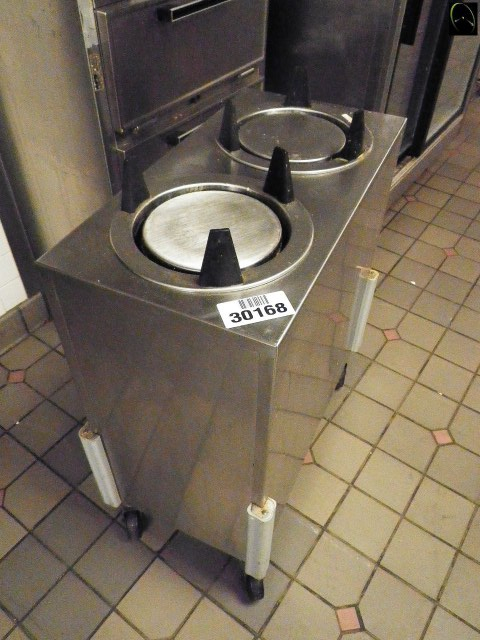

In [104]:
from IPython.display import Image

Image('http://images.rasmuscatalog.com/M20217%20Former%20Bank/30168.jpg')

# Call stack
- holds runtime info for function calls
- important for understanding recursion, generators, and error handling
- each time a function is called, a new 'stack frame' is 'pushed' onto the call stack
- each time a function returns, its stack frame is 'popped' from the call stack
- nothing special about recursive calls
- demo using spyder

# lambda
- 'lambda' defines anonymous functions(function doesn't get a name)
- 'def' is a statement, 'lambda' is an expression, so lambda can go places def can't
- lambda body is a single expression, so can not be as complex as a lambda
- mainly intended for simple things
- type name is 'function'

In [105]:
# z holds a reference to the lambda object defined on the right

z = lambda x : x + 5
[z(33), type(z)]

[38, function]

In [106]:
# call each lambda

[f(10) for f in lams]

[10, 11, 12, 13, 14]

In [107]:
# 'map' takes a function and a list as args
# the function is applied to each element of the list,
# and the values returned by the function are collected 
# into a new list
# map is lazy

def add2(n):
    return n + 2

list(map(add2, [1,4,3,7]))

[3, 6, 5, 9]

In [39]:
# with a lambda, can directly pass function as an arg
# without first setting a name with def - 
# less clutter

list(map(lambda x : x + 2, [1,4,3,7]))


[3, 6, 5, 9]

# Multiple value return
- strictly speaking, a function returns at most one object,
but it is easy to return multiple values using destructuring


In [108]:
def foo(n):
    return [n, n-1]

[x , y] = foo(5)

[x, y]

[5, 4]

In [109]:
# will also see return value(s) at top level

foo(10)

[10, 9]

# Function overloading
- Python does not have 'overloaded' functions, like C/C++/Java
- in those languages, can do

void foo(float f) {  // do float thing }

void foo(string s) ( // do string thing }

- no argument types in Python, so can't tell the two foo's apart, so no overloading in python
- but, can do something similiar with run time typing

In [110]:
def foo(arg): 
    if isinstance(arg, (int, float)): 
        print('do number thing')
    if isinstance(arg, str):
        print('do string thing')

foo(34.4)
foo(234)
foo('')

do number thing
do number thing
do string thing


# Function definitions can specify complex argument processing
- Sort of a pattern matching scheme - many possibilities
- Downside - makes function calls more expensive
- Two arg types
    - positional
    - keyword
- Args can be matched or collected

In [111]:
# three required positional args

def a3(a,b,c):
    return(a,b,c)

a3(1,2,3)

(1, 2, 3)

In [112]:
# only two args is an error
# all three must be matched

a3(1,2)

TypeError: a3() missing 1 required positional argument: 'c'

In [113]:
# by using 'keyword args' (a=2), can supply the args in arbitrary order

[a3(1,2,3), a3(1, c=2, b=3), a3(c=5, a=2, b=8)]

[(1, 2, 3), (1, 3, 2), (2, 8, 5)]

In [114]:
# can give args default values

def a3(a, b, c=22):
    return([a,b,c])

[a3(2,3,4), a3(2,3), a3(b=3,a=2), a3(b=3,c=9,a=2)]

[[2, 3, 4], [2, 3, 22], [2, 3, 22], [2, 3, 9]]

In [115]:
# b must get a value

a3(c=5, a=3)

TypeError: a3() missing 1 required positional argument: 'b'

In [116]:
# can pick up any number of 'unclaimed' positional and keyword args
# *pos is a tuple
# **kws is a dictionary
# all positional args must come before keyword args

def pk(a, b, c=5, *pos, **kws):
    return([a, b, c, pos, kws])

pk(1,2,3,4,5,6, foo=5, bar=9)

[1, 2, 3, (4, 5, 6), {'bar': 9, 'foo': 5}]

# Example: discriminate on number of args
- in C/Java

void foo(float f) { // do one arg thing }

void foo(float f, float f2) ( // do two arg thing }


In [117]:
def onetwo(*pos):
    if 1 == len(pos):
        a = pos[0]
        print('one arg',a)
    else:
        [a,b] = pos
        print('two args', a, b)


In [118]:
onetwo(1)

one arg 1


In [119]:
onetwo(1,2)

two args 1 2


# Function caller can manipulate how arguments are passed

In [120]:
def foo(a,b,c):
    return([a,b,c])

# '*' 'spreads' a list over the positional args
foo(*[1,2,3])

[1, 2, 3]

In [121]:
# *pos gets the range
# '**kw' maps a dictionary into keyword args

def bar(*pos, **kw):
    return(pos, kw)

d = {'mudd':'compsci', 'butler':'library'}
bar(*range(5), **d)

((0, 1, 2, 3, 4), {'butler': 'library', 'mudd': 'compsci'})

# Example: 'printf' style args

In [124]:
def printf(controlString, *vals):
    print(controlString)
    print(vals)
    return controlString.format(*vals)

printf('an int: {} a float: {} a string: {}', 234, 3.34, 'foo')

an int: {} a float: {} a string: {}
(234, 3.34, 'foo')


'an int: 234 a float: 3.34 a string: foo'

# Top level builtin functions
- [full list](https://docs.python.org/3.5/library/functions.html)

# Full list of operators
- [operators](https://docs.python.org/3/library/operator.html#mapping-operators-to-functions)

# Horrible!! What is going on??

In [56]:
def foo(x=[]):
    x.append(1)
    return(x)

In [57]:
foo([2,3])

[2, 3, 1]

In [58]:
foo([])

[1]

In [59]:
foo()

[1]

In [60]:
foo()

[1, 1]

In [61]:
foo()

[1, 1, 1]

In [62]:
foo()

[1, 1, 1, 1]

In [63]:
# the x=[] happens at function definition time, not at invocation time
# so a redefinition will 'reset' 

def foo(x=[]):
    x.append(1)
    return(x)

foo()

[1]

In [64]:
foo()

[1, 1]

In [65]:
foo()

[1, 1, 1]